In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import csv
import numpy as np


from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import scores

In [4]:
print('Training Data is being read ....')
# # Reading in the Data
path_f=os.getcwd()

path_f_1=os.path.join(path_f, 'data')


names=[]
for files_txts in os.listdir(path_f_1):
    if files_txts.endswith(".csv"):
        #print(files_txts)
        names.append(files_txts)
        
print(names)
        
path_train=os.path.join(path_f_1, names[1])
path_test=os.path.join(path_f_1, names[0])

df_train=pd.read_csv(path_train)
df_train.shape

print('Training Data has been read and feature engineering is being performed....')

# ## Data Manipulation

#  - Transforming the outcome to a numpy vector

stab_vector=df_train['stabilityVec'].values
y=[]
for x in stab_vector:
    #print(x)
    a=np.fromstring(x[1:-1],sep=',').astype(int)
    y.append(a)
y=np.array(y) 

df_tmp = pd.DataFrame(y, columns = ['A', 'A91B', 'A82B','A73B','A64B','A55B','A46B','A37B','A28B','A19B','B'])
stab_vec_list=[ 'A91B', 'A82B','A73B','A64B','A55B','A46B','A37B','A28B','A19B']

df_train=df_train.drop("stabilityVec",axis=1) #removing the results which originally are a string
feature_cols=list(df_train)

print(df_train.shape)

df_train=pd.concat([df_train, df_tmp],axis=1)
print(df_train.shape)

df_train['formulaA']=df_train['formulaA_elements_Number']
df_train['formulaB']=df_train['formulaB_elements_Number']



# ### Input Data Normalization and Feature Engineering


y_all=df_train[stab_vec_list]
df_tmp_stable = pd.DataFrame( columns = ['Stable_compunds'])
df_tmp_stable['Stable_compunds']=np.logical_not(y_all.sum(axis=1)==0).astype(int) ## A one means it has a stable value  a 0 

df_train=pd.concat([df_train, df_tmp_stable],axis=1)
print(df_train.shape)

df_train.head()

Training Data is being read ....
['test_data.csv', 'training_data.csv']
Training Data has been read and feature engineering is being performed....
(2572, 98)
(2572, 109)
(2572, 110)


,formulaA,formulaB,formulaA_elements_AtomicVolume,formulaB_elements_AtomicVolume,formulaA_elements_AtomicWeight,formulaB_elements_AtomicWeight,formulaA_elements_BoilingT,formulaB_elements_BoilingT,formulaA_elements_BulkModulus,formulaB_elements_BulkModulus,...,A82B,A73B,A64B,A55B,A46B,A37B,A28B,A19B,B,Stable_compunds
0,89,47,37.433086,17.075648,227.0,107.868200,3473.0,2435.0,0.0,100.0,...,0,1,0,1,0,0,0,0,1,1
1,89,13,37.433086,16.594425,227.0,26.981539,3473.0,2792.0,0.0,76.0,...,0,1,0,0,0,0,0,0,1,1
2,89,33,37.433086,21.723966,227.0,74.921600,3473.0,887.0,0.0,22.0,...,0,0,0,0,0,0,0,0,1,0
3,89,56,37.433086,64.969282,227.0,137.327000,3473.0,2143.0,0.0,9.6,...,0,0,0,0,0,0,0,0,1,0
4,89,83,37.433086,35.483459,227.0,208.980400,3473.0,1837.0,0.0,31.0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
## Observing how many element pairs produce a stable compound per % and overall

y_all=df_train[stab_vec_list]

count=0
    
y = df_train[stab_vec_list[count]]
print(y.value_counts())

stable_comp=df_train.loc[y==1,['formulaA','formulaB']] # Find the elements that create a stable element in this vector component
print('Compound being analyzed is',stab_vec_list[count])
stable_comp_num=stable_comp.values
stable_A=np.unique(stable_comp_num[:,0])
stable_B=np.unique(stable_comp_num[:,1])
    
df_unique= pd.DataFrame()

y_unique= pd.DataFrame()
    
for cnt in range(stable_A.shape[0]):

    df_tmp1=y.loc[df_train['formulaA']==stable_A[cnt]]
    y_unique=pd.concat([y_unique, df_tmp1],axis=0)
        
    df_tmp=df_train.loc[df_train['formulaA']==stable_A[cnt]]
    df_unique=pd.concat([df_unique, df_tmp],axis=0)
        

    


for cnt in range(stable_B.shape[0]):
    df_tmp1=y.loc[df_train['formulaB']==stable_B[cnt]]
    y_unique=pd.concat([y_unique, df_tmp1],axis=0)
        
    df_tmp=df_train.loc[df_train['formulaB']==stable_B[cnt]]
    df_unique=pd.concat([df_unique, df_tmp],axis=0)

    
y_unique=y.iloc[y_unique.index.unique()]
df_unique=df_train.iloc[df_unique.index.unique()]
print(y_unique.value_counts())
print('The elements in these compounds create a stable compound for this component of the stability vector:',y_unique.shape)
    
    
y_stable=y_unique.loc[np.logical_not(y_all.sum(axis=1)==0)]
df_stable=df_unique.loc[np.logical_not(y_all.sum(axis=1)==0)]
print(y_stable.value_counts())
print('The elements in these compounds create a stable compound for this component of the stability vector and create at least one stable compound:',y_stable.shape)



0    2522
1      50
Name: A91B, dtype: int64
Compound being analyzed is A91B
0    1332
1      50
Name: A91B, dtype: int64
The elements in these compounds create a stable compound for this component of the stability vector: (1382,)
0    580
1     50
Name: A91B, dtype: int64
The elements in these compounds create a stable compound for this component of the stability vector and create at least one stable compound: (630,)


## Normalization strategies

In [56]:
# Pearson Correlation to Identify the features that influence the most on the output 
print('Pearson Correlation has been calculated to build the model in the most relevant features ....')
X_train_new=df_stable[feature_cols] #This means we will only train on the elements that create a stable compound for this component of the stability vector and have at least one stable compound

y_new=y_stable
print('Number of Results to train on:',y_new.shape)


# Normalizing such that the magnitude is one
from sklearn.preprocessing import normalize

X_train_new_mag_1=normalize(X_train_new, axis=1) # vector magnitude is one
print(X_train_new_mag_1.shape)


## Normalizing by Zscore
from scipy.stats import zscore
X_train_new_Z_score=X_train_new.apply(zscore)
print(X_train_new_Z_score.shape)



## Normalizing so that range is 0-1
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_new_0_1=min_max_scaler.fit_transform(X_train_new)
print(X_train_new_0_1.shape)


## Normalizing so that range is -1 to 1
from sklearn import preprocessing
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_new_m1_p1=max_abs_scaler.fit_transform(X_train_new)
print(X_train_new_m1_p1.shape)


# Using PCA as input
X_train_4_PCA=df_stable[feature_cols]
indx_4_PC=X_train_4_PCA.index
X_train_new_mag_1_PCA=normalize(X_train_4_PCA, axis=1)


pca = PCA()
pca.fit(X_train_new_mag_1_PCA)
components = pca.components_[:20,:]
new_data = np.dot(X_train_new_mag_1_PCA, components.T)
X_train_new_PCA=new_data

print(X_train_new_PCA.shape)


## Taking Logarithm of High Values

X_train_new_log=X_train_new.copy()
X_train_new_log[X_train_new_log>100]=X_train_new_log[X_train_new_log>100].apply(np.log)
print(X_train_new_log.shape)

Pearson Correlation has been calculated to build the model in the most relevant features ....
Number of Results to train on: (630,)
(630, 98)
(630, 98)
(630, 98)
(630, 98)
(630, 20)
(630, 98)


/nv/hp22/dmo7/data/anaconda3/envs/pytorch_PACE/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [57]:
X_train_new.head()

,formulaA,formulaB,formulaA_elements_AtomicVolume,formulaB_elements_AtomicVolume,formulaA_elements_AtomicWeight,formulaB_elements_AtomicWeight,formulaA_elements_BoilingT,formulaB_elements_BoilingT,formulaA_elements_BulkModulus,formulaB_elements_BulkModulus,...,formulaA_elements_Row,formulaB_elements_Row,formulaA_elements_ShearModulus,formulaB_elements_ShearModulus,formulaA_elements_SpaceGroupNumber,formulaB_elements_SpaceGroupNumber,avg_coordination_A,avg_coordination_B,avg_nearest_neighbor_distance_A,avg_nearest_neighbor_distance_B
1119,3,13,21.544058,16.594425,6.941,26.981539,1615.0,2792.0,11.0,76.0,...,2,3,4.2,26.0,229,225,8.0,12.0,2.96771,2.85595
1120,3,79,21.544058,16.947064,6.941,196.966569,1615.0,3129.0,11.0,220.0,...,2,6,4.2,27.0,229,225,8.0,12.0,2.96771,2.94955
1121,3,5,21.544058,7.297767,6.941,10.811000,1615.0,4273.0,11.0,320.0,...,2,2,4.2,0.0,229,166,8.0,5.5,2.96771,1.72536
1127,3,49,21.544058,26.082658,6.941,114.818000,1615.0,2345.0,11.0,0.0,...,2,5,4.2,0.0,229,139,8.0,12.0,2.96771,3.33944
1133,3,15,21.544058,28.214122,6.941,30.973762,1615.0,553.5,11.0,11.0,...,2,3,4.2,0.0,229,2,8.0,3.0,2.96771,2.21377


In [58]:
X_train_new_log.head()

,formulaA,formulaB,formulaA_elements_AtomicVolume,formulaB_elements_AtomicVolume,formulaA_elements_AtomicWeight,formulaB_elements_AtomicWeight,formulaA_elements_BoilingT,formulaB_elements_BoilingT,formulaA_elements_BulkModulus,formulaB_elements_BulkModulus,...,formulaA_elements_Row,formulaB_elements_Row,formulaA_elements_ShearModulus,formulaB_elements_ShearModulus,formulaA_elements_SpaceGroupNumber,formulaB_elements_SpaceGroupNumber,avg_coordination_A,avg_coordination_B,avg_nearest_neighbor_distance_A,avg_nearest_neighbor_distance_B
1119,3,13,21.544058,16.594425,6.941,26.981539,7.38709,7.934513,11.0,76.000000,...,2,3,4.2,26.0,5.433722,5.416100,8.0,12.0,2.96771,2.85595
1120,3,79,21.544058,16.947064,6.941,5.283034,7.38709,8.048469,11.0,5.393628,...,2,6,4.2,27.0,5.433722,5.416100,8.0,12.0,2.96771,2.94955
1121,3,5,21.544058,7.297767,6.941,10.811000,7.38709,8.360071,11.0,5.768321,...,2,2,4.2,0.0,5.433722,5.111988,8.0,5.5,2.96771,1.72536
1127,3,49,21.544058,26.082658,6.941,4.743348,7.38709,7.760041,11.0,0.000000,...,2,5,4.2,0.0,5.433722,4.934474,8.0,12.0,2.96771,3.33944
1133,3,15,21.544058,28.214122,6.941,30.973762,7.38709,6.316262,11.0,11.000000,...,2,3,4.2,0.0,5.433722,2.000000,8.0,3.0,2.96771,2.21377


In [105]:
print('Number of Training Features before Pearson correlation:', X_train_new.shape[1])

df_tmp=pd.DataFrame(data=X_train_new_mag_1,columns=feature_cols)
corr_df=pd.concat([df_tmp, y_new],axis=1)
a=corr_df.corr()
#a['Stable_compunds'].hist(bins=7, figsize=(18, 12), xlabelsize=10)




Number of Training Features before Pearson correlation: 7


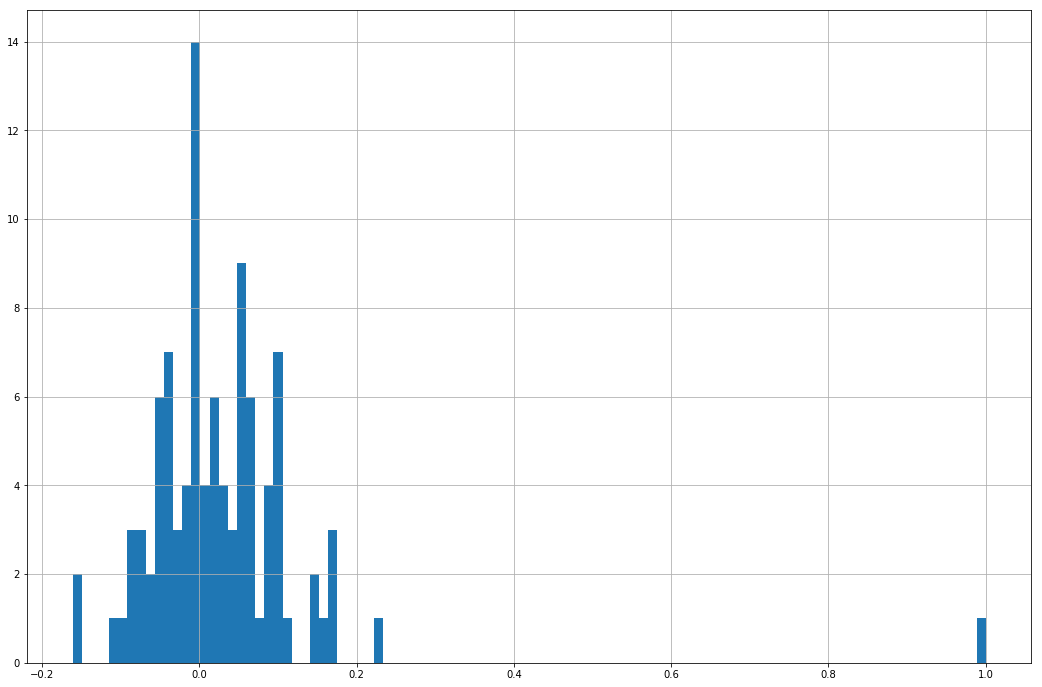

In [106]:
a[stab_vec_list[count]].hist(bins=100, figsize=(18, 12), xlabelsize=10)

In [107]:
## Incorporating the Features that contribute the most based on a pearson correlation coefficient threshold

thr=.13

corr_variables=list(a[a[stab_vec_list[count]].abs()>thr].index)

del(corr_variables[-1])


print('Pearson Correlation has identified', len(corr_variables), 'with ', str(thr) )

## Normalization of Input Data

## Using Un-normalized data as input
X_train_new=df_stable[corr_variables]

print('Number of Training Features after Pearson correlation:', X_train_new.shape[1])

Pearson Correlation has identified 9 with  0.13
Number of Training Features after Pearson correlation: 9


In [88]:
corr_variables_minmax=corr_variables

In [108]:
corr_variables_newmag=corr_variables

In [74]:
corr_variables_log=corr_variables

In [82]:
corr_variables_z_score=corr_variables

In [78]:
corr_variables_non_norm=corr_variables

In [95]:
set(corr_variables_log)-set(corr_variables_non_norm)

['formulaB_elements_MiracleRadius']

In [96]:
set(corr_variables_log)-set(corr_variables_non_norm)

{'formulaB_elements_MiracleRadius'}

In [97]:
set(corr_variables_z_score)-set(corr_variables_non_norm)

{'formulaA_elements_CovalentRadius',
 'formulaA_elements_MiracleRadius',
 'formulaB_elements_AtomicWeight'}

In [101]:
set(corr_variables_non_norm)-set( corr_variables_minmax)

{'avg_nearest_neighbor_distance_A',
 'avg_nearest_neighbor_distance_B',
 'formulaA_elements_AtomicVolume',
 'formulaA_elements_Column',
 'formulaA_elements_Electronegativity',
 'formulaA_elements_FirstIonizationEnergy',
 'formulaA_elements_GSestBCClatcnt',
 'formulaA_elements_GSestFCClatcnt',
 'formulaA_elements_GSvolume_pa',
 'formulaA_elements_ICSDVolume',
 'formulaA_elements_IsAlkali',
 'formulaA_elements_MendeleevNumber',
 'formulaA_elements_Polarizability',
 'formulaB',
 'formulaB_elements_AtomicVolume',
 'formulaB_elements_CovalentRadius',
 'formulaB_elements_GSestBCClatcnt',
 'formulaB_elements_GSestFCClatcnt',
 'formulaB_elements_GSvolume_pa',
 'formulaB_elements_HeatCapacityMass',
 'formulaB_elements_HeatCapacityMolar',
 'formulaB_elements_ICSDVolume',
 'formulaB_elements_Number',
 'formulaB_elements_Row'}

## Different Normalizations yield different features that have been identified.

-Using the raw data still provides good results